# COSE474-2024F Deep Learning HW 1
- **Chapter 4**
- 2021170964 박경빈

## 0.1. Installation


In [ ]:
!pip install d2l==1.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.7 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 6.8 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uni



---



## 4.1. Softmax Regression

### 4.1.1. Classification

If we say each input consists of a $2\times2$ grayscale image:
- We can represent each pixel value with a single scalar,
giving us four features $x_1, x_2, x_3, x_4$.
- Let's assume that each image belongs to one
among the categories "cat", "chicken", and "dog".

**One-Hot Encoding**
- A one-hot encoding is a vector
with as many components as we have categories.
The component corresponding to a particular instance's category is set to 1
and all other components are set to 0.
- In our case, a label $y$ would be a three-dimensional vector,
with $(1, 0, 0)$ corresponding to "cat", $(0, 1, 0)$ to "chicken",
and $(0, 0, 1)$ to "dog":

$$y \in \{(1, 0, 0), (0, 1, 0), (0, 0, 1)\}.$$

### 4.1.1.1. Linear Model

Since we have 4 features and 3 possible output categories,
we need 12 scalars to represent the weights ($w$ with subscripts),
and 3 scalars to represent the biases ($b$ with subscripts). This yields:

$$
\begin{aligned}
o_1 &= x_1 w_{11} + x_2 w_{12} + x_3 w_{13} + x_4 w_{14} + b_1,\\
o_2 &= x_1 w_{21} + x_2 w_{22} + x_3 w_{23} + x_4 w_{24} + b_2,\\
o_3 &= x_1 w_{31} + x_2 w_{32} + x_3 w_{33} + x_4 w_{34} + b_3.
\end{aligned}
$$

The corresponding neural network diagram
is shown in :numref:`fig_softmaxreg`.
Just as in linear regression,
we use a single-layer neural network.
And since the calculation of each output, $o_1, o_2$, and $o_3$,
depends on every input, $x_1$, $x_2$, $x_3$, and $x_4$,
the output layer can also be described as a *fully connected layer*.

![Softmax regression is a single-layer neural network.](http://d2l.ai/_images/softmaxreg.svg)

### 4.1.1.2. The Softmax

We could try to minimize the difference
between $\mathbf{o}$ and the labels $\mathbf{y}$. However, it is nonetheless unsatisfactory in the following ways:
- There is no guarantee that the outputs $o_i$ sum up to $1$ in the way we expect probabilities to behave.
- There is no guarantee that the outputs $o_i$ are even nonnegative, even if their outputs sum up to $1$, or that they do not exceed $1$.

As such, we need a mechanism to "squish" the outputs.

$$\hat{\mathbf{y}} = \mathrm{softmax}(\mathbf{o}) \quad \textrm{where}\quad \hat{y}_i = \frac{\exp(o_i)}{\sum_j \exp(o_j)}.$$

Moreover, because the softmax operation
preserves the ordering among its arguments,
we do not need to compute the softmax
to determine which class has been assigned the highest probability. Thus,

$$
\operatorname*{argmax}_j \hat y_j = \operatorname*{argmax}_j o_j.
$$

### 4.1.1.3. Vectorization

To improve computational efficiency,
we vectorize calculations in minibatches of data.
Assume that we are given a minibatch $\mathbf{X} \in \mathbb{R}^{n \times d}$
of $n$ examples with dimensionality (number of inputs) $d$.
Moreover, assume that we have $q$ categories in the output.
Then the weights satisfy $\mathbf{W} \in \mathbb{R}^{d \times q}$
and the bias satisfies $\mathbf{b} \in \mathbb{R}^{1\times q}$.

$$ \begin{aligned} \mathbf{O} &= \mathbf{X} \mathbf{W} + \mathbf{b}, \\ \hat{\mathbf{Y}} & = \mathrm{softmax}(\mathbf{O}). \end{aligned} $$

- This accelerates the dominant operation into
a matrix--matrix product $\mathbf{X} \mathbf{W}$.
- Moreover, since each row in $\mathbf{X}$ represents a data example,
the softmax operation itself can be computed *rowwise*:
for each row of $\mathbf{O}$, exponentiate all entries
and then normalize them by the sum.

### 4.1.2. Loss Function

Now that we have a mapping from features $\mathbf{x}$
to probabilities $\mathbf{\hat{y}}$,
we need a way to **optimize the accuracy** of this mapping.
We will rely on maximum likelihood estimation.

### 4.1.2.1. Log-Likelihood

The softmax function gives us a vector $\hat{\mathbf{y}}$,
which we can interpret as the (estimated) conditional probabilities
of each class, given any input $\mathbf{x}$,
such as $\hat{y}_1$ = $P(y=\textrm{cat} \mid \mathbf{x})$.
In the following we assume that for a dataset
with features $\mathbf{X}$ the labels $\mathbf{Y}$
are represented using a one-hot encoding label vector.
We can compare the estimates with reality
by checking how probable the actual classes are
according to our model, given the features:

$$
P(\mathbf{Y} \mid \mathbf{X}) = \prod_{i=1}^n P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)}).
$$


- We are allowed to use the factorization
since we assume that each label is drawn independently
from its respective distribution $P(\mathbf{y}\mid\mathbf{x}^{(i)})$.

- We take the negative logarithm to obtain the equivalent problem
of minimizing the negative log-likelihood:
$$
-\log P(\mathbf{Y} \mid \mathbf{X}) = \sum_{i=1}^n -\log P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)})
= \sum_{i=1}^n l(\mathbf{y}^{(i)}, \hat{\mathbf{y}}^{(i)}),
$$

where for any pair of label $\mathbf{y}$
and model prediction $\hat{\mathbf{y}}$
over $q$ classes, the loss function $l$ is

$$ l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^q y_j \log \hat{y}_j. $$

### 4.1.2.2. Softmax and Cross-Entropy Loss

Using the definition of the softmax and cross-entropy we obtain

$$
\begin{aligned}
l(\mathbf{y}, \hat{\mathbf{y}}) &=  - \sum_{j=1}^q y_j \log \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} \\
&= \sum_{j=1}^q y_j \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j \\
&= \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j.
\end{aligned}
$$

Consider the derivative with respect to any logit $o_j$. We get

$$
\partial_{o_j} l(\mathbf{y}, \hat{\mathbf{y}}) = \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} - y_j = \mathrm{softmax}(\mathbf{o})_j - y_j.
$$

### 4.1.3. Information Theory Basics

*Information theory* deals with the problem
of encoding, decoding, transmitting,
and manipulating information (also known as data).

### 4.1.3.1. Entropy

The central idea in information theory is to quantify the
amount of information contained in data.
This places a  limit on our ability to compress data.
For a distribution $P$ its *entropy*, $H[P]$, is defined as:

$$H[P] = \sum_j - P(j) \log P(j).$$

In order to encode data drawn randomly from the distribution $P$,
we need at least $H[P]$ "nats" to encode it

### 4.1.3.2. Surprisal

If we cannot perfectly predict every event,
then we might sometimes be surprised.
Our surprise is greater when an event is assigned lower probability.
Claude Shannon settled on $\log \frac{1}{P(j)} = -\log P(j)$
to quantify one's *surprisal* at observing an event $j$
having assigned it a (subjective) probability $P(j)$.
The **entropy is then the expected surprisal**
when one assigned the correct probabilities
that truly match the data-generating process.

### 4.1.3.3. Cross-Entropy Revisited

So if entropy is the level of surprise experienced
by someone who knows the true probability,
then you might be wondering, what is cross-entropy?
The cross-entropy *from* $P$ *to* $Q$, denoted $H(P, Q)$,
is the expected surprisal of an observer with subjective probabilities $Q$
upon seeing data that was actually generated according to probabilities $P$.
This is given by $H(P, Q) \stackrel{\textrm{def}}{=} \sum_j - P(j) \log Q(j)$.
The lowest possible cross-entropy is achieved when $P=Q$.
In this case, the cross-entropy from $P$ to $Q$ is $H(P, P)= H(P)$.

Cross-entropy classification objective:
1. as maximizing the likelihood of the observed data
2. as minimizing our surprisal (and thus the number of bits)
required to communicate the labels.

## 4.2. The Image Classification Dataset

We will focus our discussion in the coming sections on the qualitatively similar, but much smaller **Fashion-MNIST dataset** (Xiao et al., 2017) which was released in 2017. It contains images of 10 categories of clothing at 28 x 28 pixels resolution.

In [ ]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

### 4.2.1. Loading the Dataset

In [ ]:
class FashionMNIST(d2l.DataModule):
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

In [ ]:
data = FashionMNIST(resize=(32, 32))
len(data.train), len(data.val)

100%|██████████| 26421880/26421880 [00:01<00:00, 15380673.39it/s]


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 311218.36it/s]


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5480919.57it/s]


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5190451.20it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



(60000, 10000)

In [ ]:
data.train[0][0].shape

torch.Size([1, 32, 32])

In [ ]:
@d2l.add_to_class(FashionMNIST)
def text_labels(self, indices):
    """Return text labels."""
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

### 4.2.2. Reading a Minibatch

In [ ]:
@d2l.add_to_class(FashionMNIST)
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=self.num_workers)

In [ ]:
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


In [ ]:
tic = time.time()
for X, y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

'13.03 sec'

### 4.2.3. Visualization

In [ ]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images."""
    raise NotImplementedError

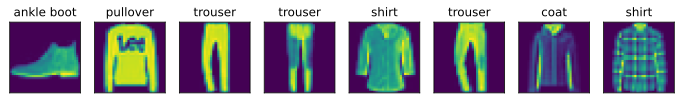

In [ ]:
@d2l.add_to_class(FashionMNIST)
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)
batch = next(iter(data.val_dataloader()))
data.visualize(batch)

## 4.3. The Base Classification Model

In [ ]:
import torch
from d2l import torch as d2l

### 4.3.1. The Classifier Class

In [ ]:
class Classifier(d2l.Module):
    """The base class of classification models."""
    def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

In [ ]:
@d2l.add_to_class(d2l.Module)
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), lr=self.lr)

### 4.3.2. Accuracy

In [ ]:
@d2l.add_to_class(Classifier)
def accuracy(self, Y_hat, Y, averaged=True):
    """Compute the number of correct predictions."""
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    preds = Y_hat.argmax(axis=1).type(Y.dtype)
    compare = (preds == Y.reshape(-1)).type(torch.float32)
    return compare.mean() if averaged else compare

## 4.4. Softmax Regression Implementation from Scratch

In [ ]:
import torch
from d2l import torch as d2l

### 4.4.1. The Softmax

In [ ]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

$$\mathrm{softmax}(\mathbf{X})_{ij} = \frac{\exp(\mathbf{X}_{ij})}{\sum_k \exp(\mathbf{X}_{ik})}.$$


In [ ]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition  # The broadcasting mechanism is applied here

In [ ]:
X = torch.rand((2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.1382, 0.2614, 0.1485, 0.3026, 0.1493],
         [0.1702, 0.3190, 0.1613, 0.1455, 0.2039]]),
 tensor([1.0000, 1.0000]))

### 4.4.2. The Model

In [ ]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

In [ ]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    X = X.reshape((-1, self.W.shape[0]))
    return softmax(torch.matmul(X, self.W) + self.b)

### 4.4.3. The Cross-Entropy Loss

In [ ]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [ ]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

In [ ]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

### 4.4.4. Training

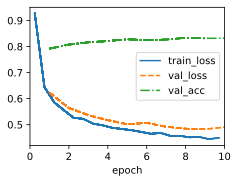

In [ ]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### 4.4.5. Prediction

In [ ]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

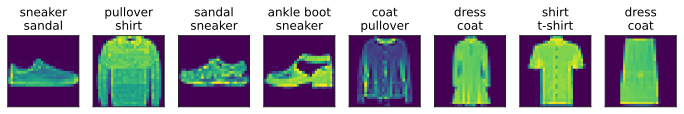

In [ ]:
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)

# Discussions & Exercises

### 4.1. Discussion

**Classification:** The task of assigning inputs to discrete categories such as predicting whether an email is spam or a user will subscribe.

**One-Hot Encoding:** A common method for representing categorical labels where each category is represented by a vector with a single 1 and the rest 0s.

**Linear Model for Classification:** A model with multiple outputs corresponding to different categories. Each output depends on the input features through an affine transformation. The softmax regression model transforms these outputs into probabilities.

**Softmax Function:** A normalization technique that transforms raw model outputs (logits) into probabilities by exponentiating them and dividing by their sum. This ensures that the outputs sum to 1 and lie between 0 and 1.
$$\hat{y} = \text{softmax}(\mathbf{o}) \quad \text{where} \quad \hat{y}_i = \frac{\exp(o_i)}{\sum_j \exp(o_j)}$$

**Loss Function (Cross-Entropy):** The cross-entropy loss is used to compare the predicted probabilities with the true labels, providing a measure of how well the model's predicted distribution matches the actual one.
$$l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^q y_j \log \hat{y}_j$$

**Vectorization:** The softmax and cross-entropy loss are computed efficiently by processing data in minibatches, making deep learning models computationally feasible.

**Information Theory Concepts:** The text introduces entropy as a measure of uncertainty in a distribution and surprisal as a measure of how "surprised" we are by an event. Cross-entropy combines these ideas to measure how well predicted probabilities match the actual distribution.

### 4.1 Exercises & My Own Experiment

My Experiment: **Softmax Regression model** to classify data points into *three* clusters.

Epoch 0/100 - Loss: 1.0687
Epoch 10/100 - Loss: 0.7773
Epoch 20/100 - Loss: 0.6863
Epoch 30/100 - Loss: 0.6273
Epoch 40/100 - Loss: 0.5847
Epoch 50/100 - Loss: 0.5521
Epoch 60/100 - Loss: 0.5260
Epoch 70/100 - Loss: 0.5046
Epoch 80/100 - Loss: 0.4866
Epoch 90/100 - Loss: 0.4712


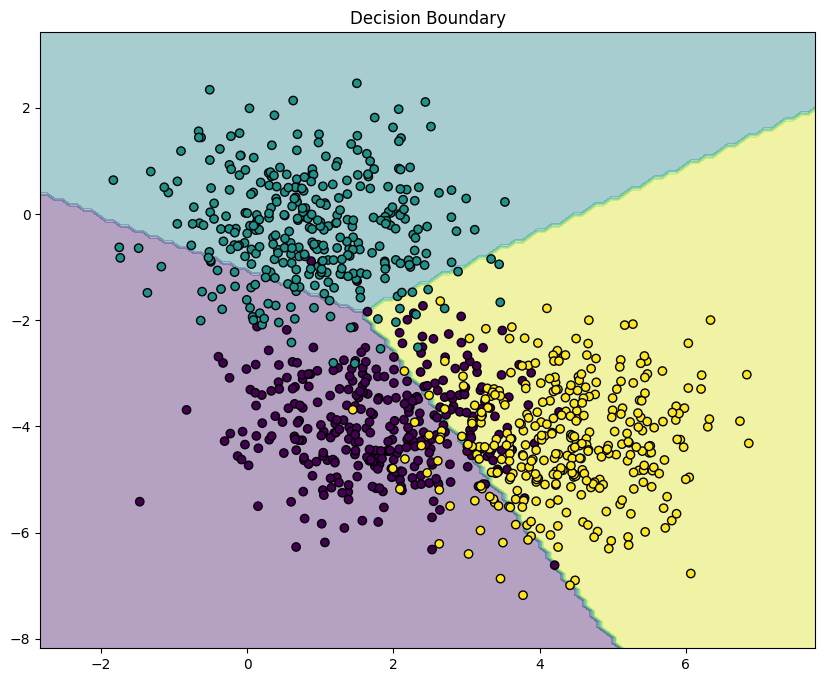

Model Accuracy: 83.18%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n_samples, n_features, n_clusters):
    X, y = [], []
    for i in range(n_clusters):
        X.append(np.random.randn(n_samples // n_clusters, n_features) + np.random.randn(n_features) * 3)
        y.append(np.full(n_samples // n_clusters, i))
    return np.vstack(X), np.concatenate(y)

X, y = generate_data(n_samples=1000, n_features=2, n_clusters=3)
y_one_hot = np.eye(3)[y]

def softmax(X):
    exp_X = np.exp(X - np.max(X, axis=1, keepdims=True))
    return exp_X / np.sum(exp_X, axis=1, keepdims=True)

class SoftmaxRegression:
    def __init__(self, input_dim, num_classes):
        self.W = np.random.randn(input_dim, num_classes) * 0.01
        self.b = np.zeros((1, num_classes))

    def forward(self, X):
        return softmax(np.dot(X, self.W) + self.b)

    def train(self, X, y, epochs, lr):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            self.W -= lr * np.dot(X.T, (y_pred - y)) / X.shape[0]
            self.b -= lr * np.mean(y_pred - y, axis=0, keepdims=True)

            if epoch % 10 == 0:
                loss = -np.mean(np.sum(y * np.log(y_pred + 1e-15), axis=1))
                print(f"Epoch {epoch}/{epochs} - Loss: {loss:.4f}")

model = SoftmaxRegression(2, 3)
model.train(X, y_one_hot, epochs=100, lr=0.1)

def plot_results(X, y, model):
    plt.figure(figsize=(10, 8))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.forward(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='black')
    plt.title('Decision Boundary')
    plt.show()

plot_results(X, y, model)

accuracy = np.mean(np.argmax(model.forward(X), axis=1) == y)
print(f"Model Accuracy: {accuracy:.2%}")

### 4.2. Discussion

**Fashion-MNIST:** A more challenging dataset than MNIST that includes 60,000 training and 10,000 test grayscale images of 10 clothing categories.

Fashion-MNIST offers a more challenging task than MNIST while maintaining the same size and simplicity, making it a better benchmark for modern models. Discussing why benchmarking datasets evolve over time is important.

1. **Dataset Benchmarking and Overfitting on Popular Datasets**
With the widespread use of datasets like MNIST, researchers might over-optimize for specific datasets, leading to models that perform well only on them. It’s worth discussing techniques or practices to avoid overfitting to benchmarks.

2. **Dataset Visualization**
The importance of visualizing data, both during exploration and throughout the development cycle, was highlighted. Discuss why human intuition is essential in identifying irregularities in datasets and how visualization helps.

3. **Importance of Diverse and Complex Datasets (Beyond Fashion-MNIST)**
While Fashion-MNIST adds more complexity than MNIST, real-world datasets are often far more complex and noisy, requiring models that generalize better. Explore other datasets and strategies for simulating real-world complexity in machine learning tasks.

### 4.2 Exercises & My Own Experiment

My Experiment: *A simple neural network* for classifying fashion items using the **Fashion MNIST dataset**.
- It loads the data, trains a model, evaluates its performance, and visualizes the results.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


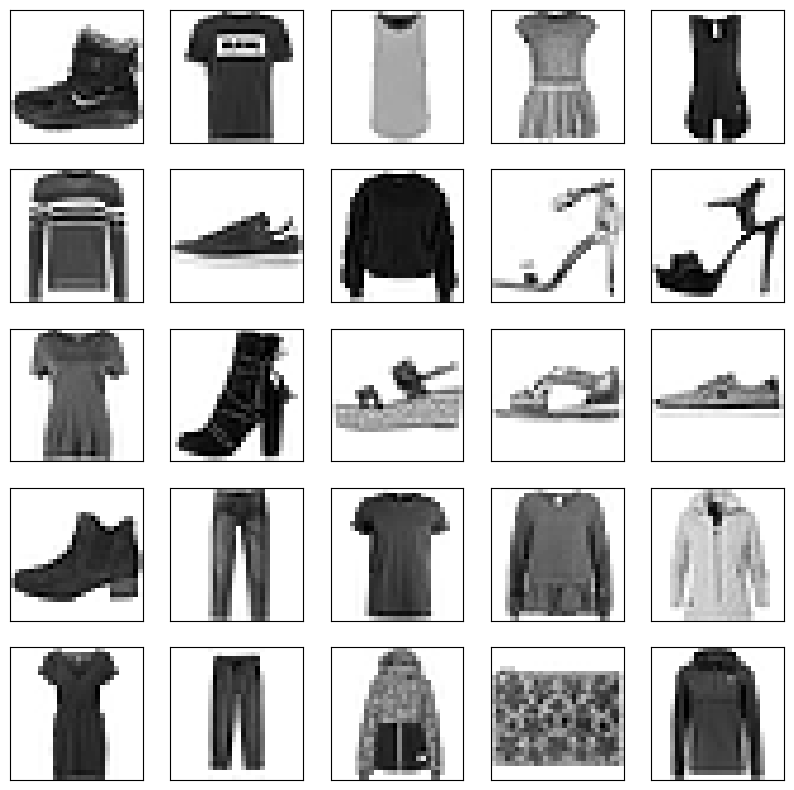

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7808 - loss: 0.6272 - val_accuracy: 0.8522 - val_loss: 0.4186
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8602 - loss: 0.3949 - val_accuracy: 0.8692 - val_loss: 0.3616
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8745 - loss: 0.3412 - val_accuracy: 0.8645 - val_loss: 0.3807
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8843 - loss: 0.3181 - val_accuracy: 0.8758 - val_loss: 0.3331
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8921 - loss: 0.2984 - val_accuracy: 0.8810 - val_loss: 0.3303
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8970 - loss: 0.2790 - val_accuracy: 0.8822 - val_loss: 0.3223
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9013 - loss: 0.2670 - val_accuracy: 0.8775 - val_loss: 0.3489
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9038 - loss: 0.2593 - 

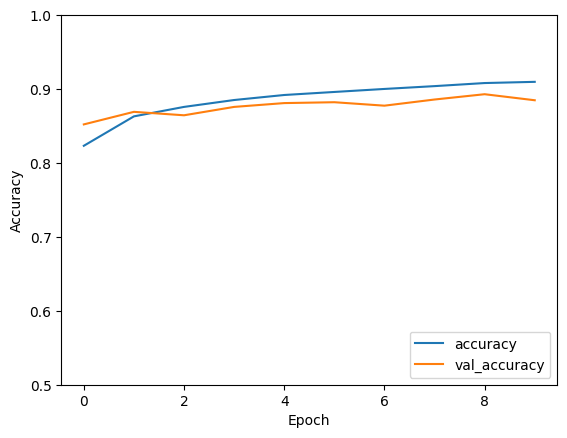

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


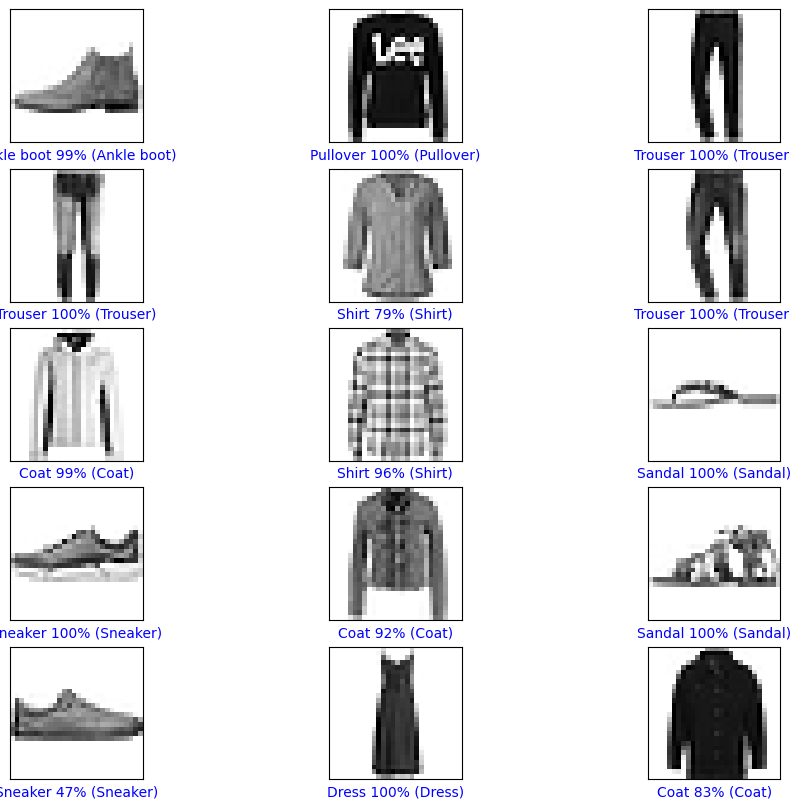

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\n테스트 정확도: {test_acc}')

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

predictions = model.predict(x_test)

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, x_test)
plt.show()

The model seems to be performing well in classifying various fashion items. Many predictions show 100% confidence, such as for trousers, pullover, sandal, and dress. However...
- Few Misclassifications: There are some misclassifications. Some notable examples are a shirt being classified with 79% confidence, and a sneaker with 47%.

### 4.3. Discussion

Classification is a sufficiently common problem that it warrants its own convenience functions.

**`Classifier` Class:**
A base class for classification models, inheriting from d2l.Module.
Contains a validation_step method, which calculates loss and accuracy on validation data, and plots the results.

**`configure_optimizers` Method:**
A method added to d2l.Module for setting up the optimizer (Stochastic Gradient Descent, SGD) with a given learning rate.

**Accuracy Calculation:**
If Y_hat (predictions) is a matrix, the second dimension contains class scores.
The predicted class is determined using argmax, which selects the class with the highest score.
Predicted classes are compared to ground truth labels Y, and accuracy is computed as the proportion of correct predictions.

### 4.3 Exercises & My Own Experiment

My Experiment: A simple neural network classifier using the Classifier Classes from chapter 4.3:

```
class Classifier(d2l.Module):
    """The base class of classification models."""
    def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)
```
```
@d2l.add_to_class(d2l.Module)
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), lr=self.lr)
```
```
@d2l.add_to_class(Classifier)
def accuracy(self, Y_hat, Y, averaged=True):
    """Compute the number of correct predictions."""
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    preds = Y_hat.argmax(axis=1).type(Y.dtype)
    compare = (preds == Y.reshape(-1)).type(torch.float32)
    return compare.mean() if averaged else compare
```



Epoch 1/100, Train Loss: 0.6813, Train Acc: 0.4938, Val Loss: 0.6500, Val Acc: 0.5223
Epoch 10/100, Train Loss: 0.3987, Train Acc: 0.9363, Val Loss: 0.3899, Val Acc: 0.9152
Epoch 20/100, Train Loss: 0.2358, Train Acc: 0.9788, Val Loss: 0.2415, Val Acc: 0.9821
Epoch 30/100, Train Loss: 0.1631, Train Acc: 0.9925, Val Loss: 0.1769, Val Acc: 0.9866
Epoch 40/100, Train Loss: 0.1264, Train Acc: 0.9938, Val Loss: 0.1424, Val Acc: 0.9821
Epoch 50/100, Train Loss: 0.1045, Train Acc: 0.9900, Val Loss: 0.1210, Val Acc: 0.9821
Epoch 60/100, Train Loss: 0.0902, Train Acc: 0.9925, Val Loss: 0.1068, Val Acc: 0.9821
Epoch 70/100, Train Loss: 0.0805, Train Acc: 0.9938, Val Loss: 0.0971, Val Acc: 0.9821
Epoch 80/100, Train Loss: 0.0733, Train Acc: 0.9950, Val Loss: 0.0899, Val Acc: 0.9821
Epoch 90/100, Train Loss: 0.0678, Train Acc: 0.9950, Val Loss: 0.0844, Val Acc: 0.9821
Epoch 100/100, Train Loss: 0.0634, Train Acc: 0.9962, Val Loss: 0.0799, Val Acc: 0.9821


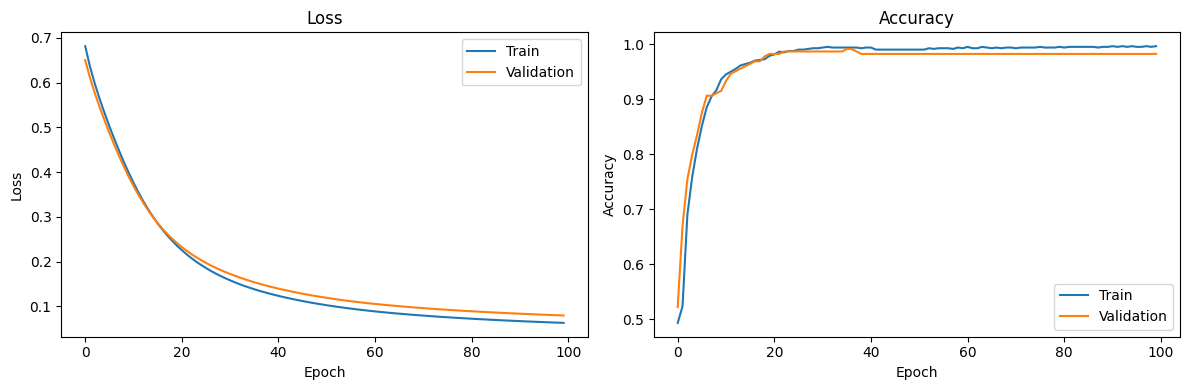

In [16]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

class d2l:
    class Module(nn.Module):
        def __init__(self):
            super().__init__()
            self.lr = 0.01

        def plot(self, name, value, train):
            pass

    @staticmethod
    def add_to_class(Class):
        def wrapper(obj):
            setattr(Class, obj.__name__, obj)
        return wrapper

################## Code from 4.3 ##################
@d2l.add_to_class(d2l.Module)
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), lr=self.lr)

class Classifier(d2l.Module):
    """The base class of classification models."""
    def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
        self.loss = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)

@d2l.add_to_class(Classifier)
def accuracy(self, Y_hat, Y, averaged=True):
    """Compute the number of correct predictions."""
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    preds = Y_hat.argmax(axis=1).type(Y.dtype)
    compare = (preds == Y.reshape(-1)).type(torch.float32)
    return compare.mean() if averaged else compare
##################################################

def generate_data(n_samples=1000):
    X = torch.randn(n_samples, 2)
    y = (X[:, 0] + X[:, 1] > 0).long()
    return X, y

def train(model, train_loader, val_loader, epochs=100):
    optimizer = model.configure_optimizers()
    train_losses, train_accs = [], []
    val_losses, val_accs = [], []

    for epoch in range(epochs):
        model.train()
        train_loss, train_acc = 0, 0
        for batch in train_loader:
            optimizer.zero_grad()
            X, y = batch
            y_hat = model(X)
            loss = model.loss(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            train_acc += model.accuracy(y_hat, y).item()

        model.eval()
        val_loss, val_acc = 0, 0
        with torch.no_grad():
            for batch in val_loader:
                model.validation_step(batch)
                X, y = batch
                y_hat = model(X)
                val_loss += model.loss(y_hat, y).item()
                val_acc += model.accuracy(y_hat, y).item()

        train_loss /= len(train_loader)
        train_acc /= len(train_loader)
        val_loss /= len(val_loader)
        val_acc /= len(val_loader)

        train_losses.append(train_loss)
        train_accs.append(train_acc)
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, '
                  f'Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, '
                  f'Val Acc: {val_acc:.4f}')

    return train_losses, train_accs, val_losses, val_accs

def plot_results(train_losses, train_accs, val_losses, val_accs):
    plt.figure(figsize=(12, 4))

    plt.subplot(121)
    plt.plot(train_losses, label='Train')
    plt.plot(val_losses, label='Validation')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(122)
    plt.plot(train_accs, label='Train')
    plt.plot(val_accs, label='Validation')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    X, y = generate_data()
    train_size = int(0.8 * len(X))
    X_train, X_val = X[:train_size], X[train_size:]
    y_train, y_val = y[:train_size], y[train_size:]

    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
    val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=32)

    model = Classifier(input_dim=2, hidden_dim=10, output_dim=2)

    train_losses, train_accs, val_losses, val_accs = train(model, train_loader, val_loader)
    plot_results(train_losses, train_accs, val_losses, val_accs)

### 4.4. Discussion

**Softmax Function:**
The softmax function transforms raw scores into probabilities by exponentiating each input and normalizing by the sum of exponentiated values.

In [ ]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition

**Model Definition:** The softmax regression model is defined by a weight matrix W and a bias vector b. The model uses these parameters to output a probability distribution over classes for each input example.

Class definition for SoftmaxRegressionScratch:

In [ ]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs), requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

**Cross-Entropy Loss:** This is the loss function commonly used for classification, which computes the negative log-likelihood of the true class's predicted probability.

Cross-entropy implementation:

In [ ]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

**Training the Model:** The training loop is reused from linear regression, and hyperparameters like the number of epochs, batch size, and learning rate are adjustable. The Fashion-MNIST dataset is used to train and validate the model.

The training process involves feeding the model through 10 epochs, using a mini-batch of 256 examples at each step.

**Prediction and Visualization:** After training, the model is used to classify images, and incorrect predictions are visualized. This helps assess where the model fails and understand its weaknesses.

### 4.4 Exercises & My Own Experiment

My Experiment: **A softmax regression model** on the **FashionMNIST dataset** using PyTorch.

epoch 1, train acc 0.003, test acc 0.003
epoch 2, train acc 0.003, test acc 0.003
epoch 3, train acc 0.003, test acc 0.003
epoch 4, train acc 0.003, test acc 0.003
epoch 5, train acc 0.003, test acc 0.003
epoch 6, train acc 0.003, test acc 0.003
epoch 7, train acc 0.003, test acc 0.003
epoch 8, train acc 0.003, test acc 0.003
epoch 9, train acc 0.003, test acc 0.003
epoch 10, train acc 0.003, test acc 0.003


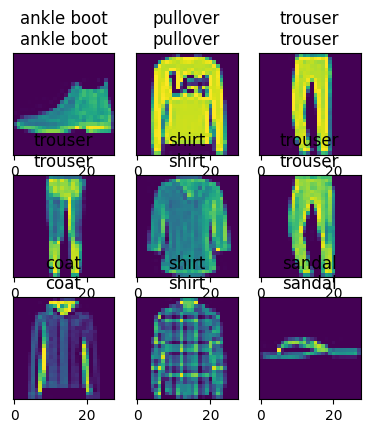

In [ ]:
# Trial and Error 1:

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition

class SoftmaxRegression(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super().__init__()
        self.W = torch.nn.Parameter(torch.normal(0, 0.01, size=(num_inputs, num_outputs)))
        self.b = torch.nn.Parameter(torch.zeros(num_outputs))

    def forward(self, X):
        return softmax(torch.matmul(X.reshape((-1, self.W.shape[0])), self.W) + self.b)

def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)), y]).mean()

def accuracy(y_hat, y):
    return (y_hat.argmax(axis=1) == y).float().mean()

def train_epoch(net, train_iter, loss, optimizer):
    net.train()
    for X, y in train_iter:
        optimizer.zero_grad()
        y_hat = net(X)
        l = loss(y_hat, y)
        l.backward()
        optimizer.step()

def evaluate_accuracy(net, data_iter):
    net.eval()
    metric = Accumulator(2)
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

class Accumulator:
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

num_inputs = 784
num_outputs = 10
net = SoftmaxRegression(num_inputs, num_outputs)

num_epochs, lr = 10, 0.1
loss = cross_entropy
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

for epoch in range(num_epochs):
    train_epoch(net, train_loader, loss, optimizer)
    train_acc = evaluate_accuracy(net, train_loader)
    test_acc = evaluate_accuracy(net, test_loader)
    print(f'epoch {epoch + 1}, train acc {train_acc:.3f}, test acc {test_acc:.3f}')


def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        ax.imshow(img.squeeze().numpy())
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

X, y = next(iter(test_loader))
trues = get_fashion_mnist_labels(y)
preds = get_fashion_mnist_labels(net(X).argmax(axis=1))
titles = [true + '\n' + pred for true, pred in zip(trues, preds)]

show_images(X[0:9], 3, 3, titles[0:9])
plt.show()

**Why accuracy is so low (0.003):**
- Guess 1. Since FashionMNIST images are 28x28 pixels, and softmax regression is too simple to learn their complex patterns. A CNN should be better for handling these kinds of images?
- Guess 2. The learning rate of lr = 0.1 might be too high?
- Guess 3. Loss Function Issue: Rather than manual cross_entropy function, using PyTorch’s torch.nn.CrossEntropyLoss() would be better?

I tried fixing the approach using CNN:

Epoch 1/10, Train Loss: 0.4348, Train Acc: 84.40%, Test Loss: 0.3378, Test Acc: 87.69%
Epoch 2/10, Train Loss: 0.2770, Train Acc: 89.90%, Test Loss: 0.2752, Test Acc: 89.64%
Epoch 3/10, Train Loss: 0.2312, Train Acc: 91.59%, Test Loss: 0.2556, Test Acc: 90.77%
Epoch 4/10, Train Loss: 0.1977, Train Acc: 92.73%, Test Loss: 0.2370, Test Acc: 91.66%
Epoch 5/10, Train Loss: 0.1697, Train Acc: 93.81%, Test Loss: 0.2299, Test Acc: 91.78%
Epoch 6/10, Train Loss: 0.1475, Train Acc: 94.48%, Test Loss: 0.2444, Test Acc: 91.20%
Epoch 7/10, Train Loss: 0.1252, Train Acc: 95.42%, Test Loss: 0.2388, Test Acc: 91.87%
Epoch 8/10, Train Loss: 0.1073, Train Acc: 96.04%, Test Loss: 0.2649, Test Acc: 91.92%
Epoch 9/10, Train Loss: 0.0891, Train Acc: 96.62%, Test Loss: 0.2486, Test Acc: 92.57%
Epoch 10/10, Train Loss: 0.0744, Train Acc: 97.30%, Test Loss: 0.2992, Test Acc: 91.88%


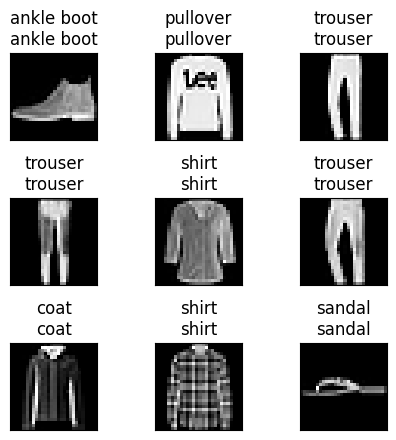

In [ ]:
# Trial and Error 2:

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    return running_loss / len(train_loader), 100. * correct / total

def evaluate(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    return running_loss / len(test_loader), 100. * correct / total

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 10
for epoch in range(num_epochs):
    train_loss, train_acc = train(model, train_loader, criterion, optimizer, device)
    test_loss, test_acc = evaluate(model, test_loader, criterion, device)
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%')

def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        ax.imshow(img.squeeze().numpy(), cmap='gray')
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

model.eval()
X, y = next(iter(test_loader))
with torch.no_grad():
    preds = model(X.to(device)).argmax(dim=1).cpu()
trues = get_fashion_mnist_labels(y)
preds = get_fashion_mnist_labels(preds)
titles = [true + '\n' + pred for true, pred in zip(trues, preds)]

show_images(X[0:9], 3, 3, titles[0:9])
plt.tight_layout()
plt.show()

**That's much better! Train Acc of 97.30% and Test Acc of 91.88%**